In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("competencia_01.csv" ,index_col = "numero_de_cliente")
df.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_25892\688113575.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("competencia_01.csv" ,index_col = "numero_de_cliente")


(978439, 154)

TIPO DE COLUMNAS

In [6]:
np.unique(df.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [7]:
df["clase_ternaria"].nunique()

3

In [8]:
df.select_dtypes(include="object")

,clase_ternaria
numero_de_cliente,
249221323,Continua
249227600,Continua
249234235,Continua
249244449,Continua
249244739,Continua
...,...
918082906,Continua
918086117,Continua
918091369,Continua


In [9]:
cat_bin_cols=[]
cat_cols =[]
num_cols=[]
for c in df.columns:
    if df[c].nunique() <= 2:
        cat_bin_cols.append(c)
    elif (df[c].nunique() > 2) & (df[c].nunique() <= 5):
        cat_cols.append(c)
    else:
        num_cols.append(c)



In [10]:
len(cat_bin_cols)

11

In [11]:
len(cat_cols)

9

In [12]:
cat_cols

['internet',
 'ccuenta_corriente',
 'ctarjeta_visa',
 'ctarjeta_master',
 'cseguro_vida',
 'cseguro_accidentes_personales',
 'Master_status',
 'Visa_status',
 'clase_ternaria']

In [13]:
df["ccaja_seguridad"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [14]:
cat_bin_cols

['active_quarter',
 'cliente_vip',
 'tcuentas',
 'cdescubierto_preacordado',
 'tcallcenter',
 'thomebanking',
 'ccajas_transacciones',
 'tmobile_app',
 'cmobile_app_trx',
 'Master_delinquency',
 'Visa_delinquency']

In [15]:
df.columns

Index(['foto_mes', 'active_quarter', 'cliente_vip', 'internet', 'cliente_edad',
       'cliente_antiguedad', 'mrentabilidad', 'mrentabilidad_annual',
       'mcomisiones', 'mactivos_margen',
       ...
       'Visa_fultimo_cierre', 'Visa_mpagado', 'Visa_mpagospesos',
       'Visa_mpagosdolares', 'Visa_fechaalta', 'Visa_mconsumototal',
       'Visa_cconsumos', 'Visa_cadelantosefectivo', 'Visa_mpagominimo',
       'clase_ternaria'],
      dtype='object', length=154)

In [16]:
lista_t=[c for c in list(map(lambda x : x if x[0]=='t' else np.nan ,df.columns )) if pd.notna(c)]
lista_c=[c for c in list(map(lambda x : x if x[0]=='c' else np.nan ,df.columns )) if pd.notna(c)]
lista_m=[c for c in list(map(lambda x : x if x[0]=='m' else np.nan ,df.columns )) if pd.notna(c)]
lista_r=[c for c in df.columns if c not in (lista_t + lista_c + lista_m)]
print(len(lista_t) , len(lista_c) , len(lista_m) , len(lista_r))
print(len(lista_t) + len(lista_c) + len(lista_m) +len(lista_r))

4 58 45 47
154


In [20]:
lista_r

['foto_mes',
 'active_quarter',
 'internet',
 'Master_delinquency',
 'Master_status',
 'Master_mfinanciacion_limite',
 'Master_Fvencimiento',
 'Master_Finiciomora',
 'Master_msaldototal',
 'Master_msaldopesos',
 'Master_msaldodolares',
 'Master_mconsumospesos',
 'Master_mconsumosdolares',
 'Master_mlimitecompra',
 'Master_madelantopesos',
 'Master_madelantodolares',
 'Master_fultimo_cierre',
 'Master_mpagado',
 'Master_mpagospesos',
 'Master_mpagosdolares',
 'Master_fechaalta',
 'Master_mconsumototal',
 'Master_cconsumos',
 'Master_cadelantosefectivo',
 'Master_mpagominimo',
 'Visa_delinquency',
 'Visa_status',
 'Visa_mfinanciacion_limite',
 'Visa_Fvencimiento',
 'Visa_Finiciomora',
 'Visa_msaldototal',
 'Visa_msaldopesos',
 'Visa_msaldodolares',
 'Visa_mconsumospesos',
 'Visa_mconsumosdolares',
 'Visa_mlimitecompra',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_fultimo_cierre',
 'Visa_mpagado',
 'Visa_mpagospesos',
 'Visa_mpagosdolares',
 'Visa_fechaalta',
 'Visa_mconsumot

In [17]:
lista_t

['tcuentas', 'tcallcenter', 'thomebanking', 'tmobile_app']

In [18]:
lista_m

['mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'mcuenta_corriente_adicional',
 'mcuenta_corriente',
 'mcaja_ahorro',
 'mcaja_ahorro_adicional',
 'mcaja_ahorro_dolares',
 'mcuentas_saldo',
 'mautoservicio',
 'mtarjeta_visa_consumo',
 'mtarjeta_master_consumo',
 'mprestamos_personales',
 'mprestamos_prendarios',
 'mprestamos_hipotecarios',
 'mplazo_fijo_dolares',
 'mplazo_fijo_pesos',
 'minversion1_pesos',
 'minversion1_dolares',
 'minversion2',
 'mpayroll',
 'mpayroll2',
 'mcuenta_debitos_automaticos',
 'mttarjeta_visa_debitos_automaticos',
 'mttarjeta_master_debitos_automaticos',
 'mpagodeservicios',
 'mpagomiscuentas',
 'mcajeros_propios_descuentos',
 'mtarjeta_visa_descuentos',
 'mtarjeta_master_descuentos',
 'mcomisiones_mantenimiento',
 'mcomisiones_otras',
 'mforex_buy',
 'mforex_sell',
 'mtransferencias_recibidas',
 'mtransferencias_emitidas',
 'mextraccion_autoservicio',
 'mcheques_depositados',
 'mcheques_emitidos',
 'mcheque

In [22]:
df[lista_m].corr()

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcuenta_corriente_adicional,mcuenta_corriente,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,...,mforex_sell,mtransferencias_recibidas,mtransferencias_emitidas,mextraccion_autoservicio,mcheques_depositados,mcheques_emitidos,mcheques_depositados_rechazados,mcheques_emitidos_rechazados,matm,matm_other
mrentabilidad,1.000000,0.766871,0.423826,0.485881,0.728014,0.117630,0.280291,0.591413,0.056154,0.067265,...,0.010764,0.119488,0.144197,0.041109,0.121089,0.087315,0.017883,0.045332,0.045054,-0.009419
mrentabilidad_annual,0.766871,1.000000,0.270665,0.314199,0.635617,0.126839,0.316702,0.494694,0.069503,0.080796,...,0.010564,0.095732,0.086789,0.048250,0.103406,0.097398,0.017811,0.016625,0.053980,-0.015369
mcomisiones,0.423826,0.270665,1.000000,-0.133622,0.178583,0.014743,0.093756,0.120655,0.010745,0.047920,...,0.005395,0.074561,0.081090,0.003999,0.083685,0.014262,0.022568,0.080850,0.018508,-0.056343
mactivos_margen,0.485881,0.314199,-0.133622,1.000000,-0.121729,-0.001371,-0.050127,-0.066169,0.001328,-0.019405,...,-0.027846,-0.031265,-0.084534,-0.041347,-0.065728,-0.056942,-0.016771,-0.008389,-0.043550,0.002546
mpasivos_margen,0.728014,0.635617,0.178583,-0.121729,1.000000,0.153237,0.375291,0.797038,0.069581,0.083304,...,0.035500,0.150636,0.226045,0.088829,0.177418,0.159524,0.026995,0.027403,0.088653,0.013786
mcuenta_corriente_adicional,0.117630,0.126839,0.014743,-0.001371,0.153237,1.000000,-0.000012,0.000179,0.000053,-0.000215,...,-0.000092,0.011133,0.008820,-0.001007,0.011155,0.005080,-0.000039,-0.000048,-0.000888,-0.000617
mcuenta_corriente,0.280291,0.316702,0.093756,-0.050127,0.375291,-0.000012,1.000000,0.055300,0.005977,0.006268,...,0.003664,0.046258,0.127743,0.025419,0.317685,0.219043,0.053359,0.024402,0.028222,-0.007254
mcaja_ahorro,0.591413,0.494694,0.120655,-0.066169,0.797038,0.000179,0.055300,1.000000,0.014815,0.069894,...,0.040998,0.112709,0.210468,0.099034,0.078822,0.089717,0.006968,0.015467,0.096603,0.024138
mcaja_ahorro_adicional,0.056154,0.069503,0.010745,0.001328,0.069581,0.000053,0.005977,0.014815,1.000000,0.005283,...,0.003655,0.004382,0.008602,0.004571,0.003035,-0.001873,-0.000310,-0.000715,0.005136,-0.001542
mcaja_ahorro_dolares,0.067265,0.080796,0.047920,-0.019405,0.083304,-0.000215,0.006268,0.069894,0.005283,1.000000,...,0.039356,0.072782,0.184297,-0.000429,0.001876,-0.001865,-0.000846,-0.000380,-0.001353,0.003564


<Axes: >

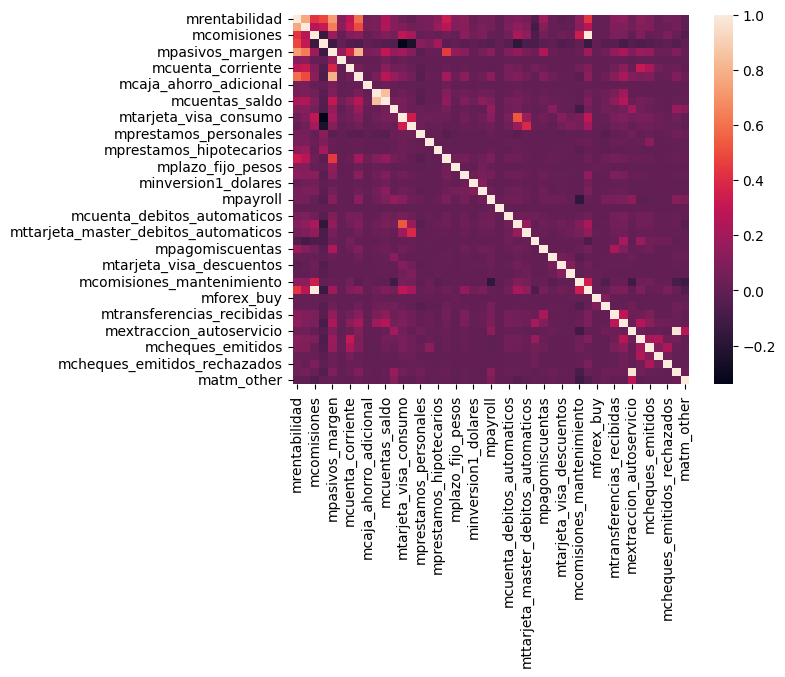

In [23]:
sns.heatmap(df[lista_m].corr())

In [83]:
df.columns

Index(['foto_mes', 'active_quarter', 'cliente_vip', 'internet', 'cliente_edad',
       'cliente_antiguedad', 'mrentabilidad', 'mrentabilidad_annual',
       'mcomisiones', 'mactivos_margen',
       ...
       'Visa_fultimo_cierre', 'Visa_mpagado', 'Visa_mpagospesos',
       'Visa_mpagosdolares', 'Visa_fechaalta', 'Visa_mconsumototal',
       'Visa_cconsumos', 'Visa_cadelantosefectivo', 'Visa_mpagominimo',
       'clase_ternaria'],
      dtype='object', length=154)

In [ ]:
df.drop(columns="clase_ternaria").corr()

In [72]:
lista_c

['cliente_vip',
 'cliente_edad',
 'cliente_antiguedad',
 'cproductos',
 'ccuenta_corriente',
 'ccaja_ahorro',
 'cdescubierto_preacordado',
 'ctarjeta_debito',
 'ctarjeta_debito_transacciones',
 'ctarjeta_visa',
 'ctarjeta_visa_transacciones',
 'ctarjeta_master',
 'ctarjeta_master_transacciones',
 'cprestamos_personales',
 'cprestamos_prendarios',
 'cprestamos_hipotecarios',
 'cplazo_fijo',
 'cinversion1',
 'cinversion2',
 'cseguro_vida',
 'cseguro_auto',
 'cseguro_vivienda',
 'cseguro_accidentes_personales',
 'ccaja_seguridad',
 'cpayroll_trx',
 'cpayroll2_trx',
 'ccuenta_debitos_automaticos',
 'ctarjeta_visa_debitos_automaticos',
 'ctarjeta_master_debitos_automaticos',
 'cpagodeservicios',
 'cpagomiscuentas',
 'ccajeros_propios_descuentos',
 'ctarjeta_visa_descuentos',
 'ctarjeta_master_descuentos',
 'ccomisiones_mantenimiento',
 'ccomisiones_otras',
 'cforex',
 'cforex_buy',
 'cforex_sell',
 'ctransferencias_recibidas',
 'ctransferencias_emitidas',
 'cextraccion_autoservicio',
 'cche

In [21]:
lista_r

['foto_mes',
 'active_quarter',
 'internet',
 'Master_delinquency',
 'Master_status',
 'Master_mfinanciacion_limite',
 'Master_Fvencimiento',
 'Master_Finiciomora',
 'Master_msaldototal',
 'Master_msaldopesos',
 'Master_msaldodolares',
 'Master_mconsumospesos',
 'Master_mconsumosdolares',
 'Master_mlimitecompra',
 'Master_madelantopesos',
 'Master_madelantodolares',
 'Master_fultimo_cierre',
 'Master_mpagado',
 'Master_mpagospesos',
 'Master_mpagosdolares',
 'Master_fechaalta',
 'Master_mconsumototal',
 'Master_cconsumos',
 'Master_cadelantosefectivo',
 'Master_mpagominimo',
 'Visa_delinquency',
 'Visa_status',
 'Visa_mfinanciacion_limite',
 'Visa_Fvencimiento',
 'Visa_Finiciomora',
 'Visa_msaldototal',
 'Visa_msaldopesos',
 'Visa_msaldodolares',
 'Visa_mconsumospesos',
 'Visa_mconsumosdolares',
 'Visa_mlimitecompra',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_fultimo_cierre',
 'Visa_mpagado',
 'Visa_mpagospesos',
 'Visa_mpagosdolares',
 'Visa_fechaalta',
 'Visa_mconsumot

<Axes: >

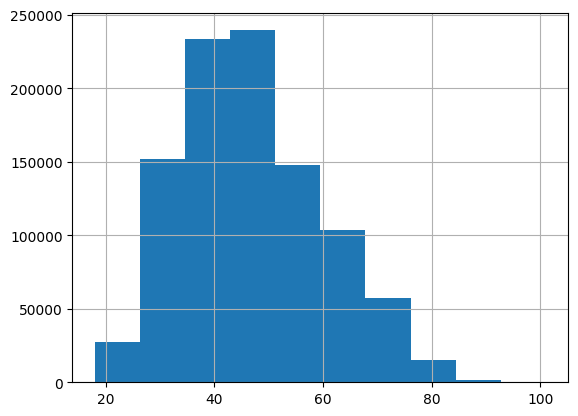

In [19]:
df["cliente_edad"].hist()

In [12]:
cat_cols

['internet',
 'ccuenta_corriente',
 'ctarjeta_visa',
 'ctarjeta_master',
 'cseguro_vida',
 'cseguro_accidentes_personales',
 'Master_status',
 'Visa_status',
 'clase_ternaria']

<Axes: >

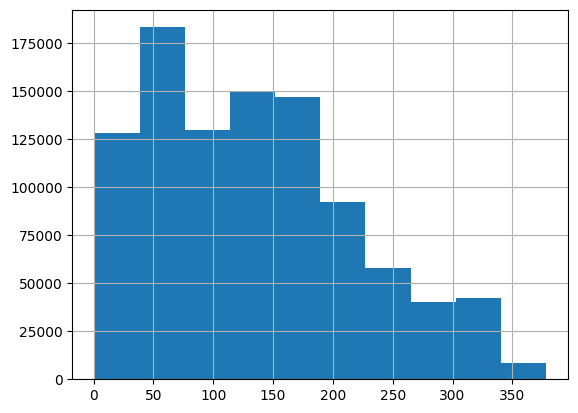

In [23]:
df["cliente_antiguedad"].hist()

<Axes: >

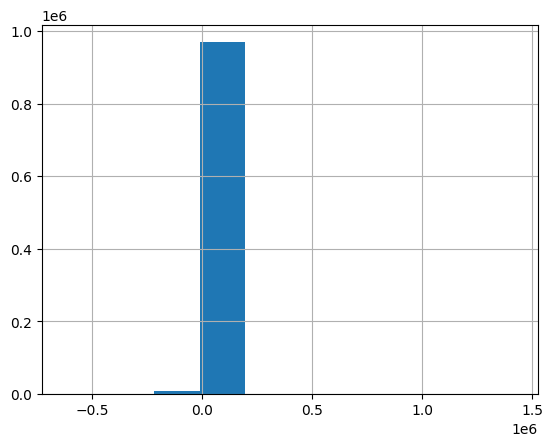

In [27]:
df[ "mrentabilidad"].hist()

<Axes: ylabel='mrentabilidad'>

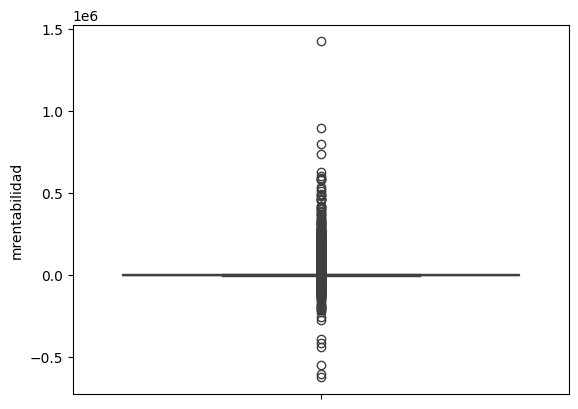

In [32]:
sns.boxplot(data = df , y="mrentabilidad")

<Axes: ylabel='mrentabilidad'>

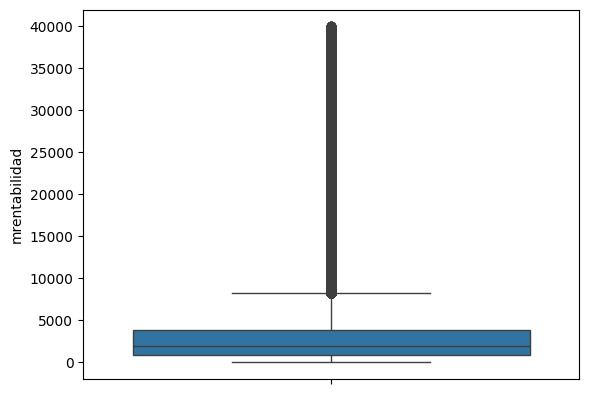

In [31]:
sns.boxplot(data = df[(df["mrentabilidad"]<0.04e6 )&(df["mrentabilidad"]>0 )] , y="mrentabilidad")

<Axes: >

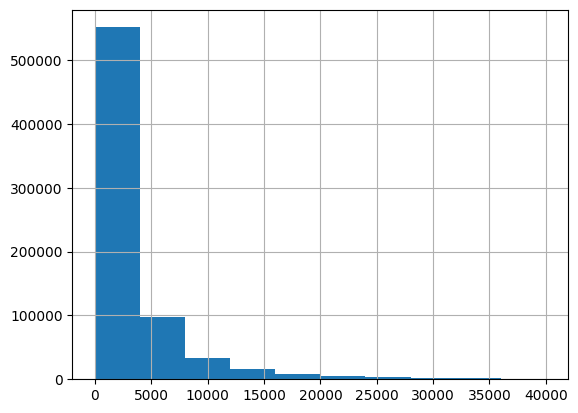

In [30]:
df.loc[(df["mrentabilidad"]<0.04e6 )&(df["mrentabilidad"]>0 ) , "mrentabilidad"].hist()

<Axes: >

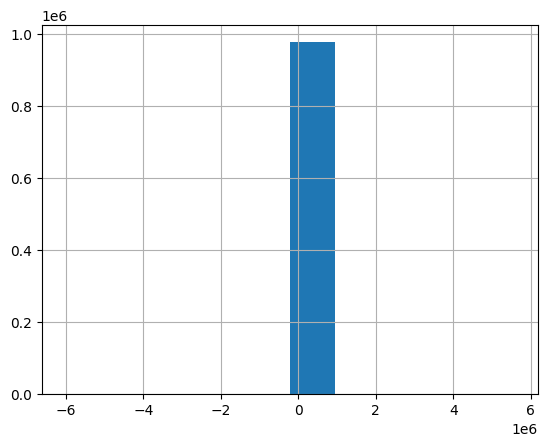

In [34]:
df["mrentabilidad_annual"].hist()

In [35]:
df["clase_ternaria"].value_counts(normalize=True)

clase_ternaria
Continua    0.986921
BAJA +1     0.007033
BAJA +2     0.006046
Name: proportion, dtype: float64

In [24]:
len(num_cols)

127

In [25]:
len(cat_cols)

27

In [37]:
sorted(df["cproductos"].unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

In [40]:
df["ccuenta_corriente"].value_counts()

ccuenta_corriente
1    976033
2      2382
3        24
Name: count, dtype: int64